In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

In [2]:
## First, let's look at the dataset
# Load iris dataset

iris = datasets.load_iris()

# Copy original data
D = iris.data
# Center the data
X = D - np.mean(D,axis=0)
# Normalize the data
X = X/np.std(X,axis=0)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

([<matplotlib.axis.XTick at 0x14c7c4fbd790>,
 [Text(1, 0, 'Sepal length'),
  Text(2, 0, 'Sepal width'),
  Text(3, 0, 'Petal length'),
  Text(4, 0, 'Petal width')])

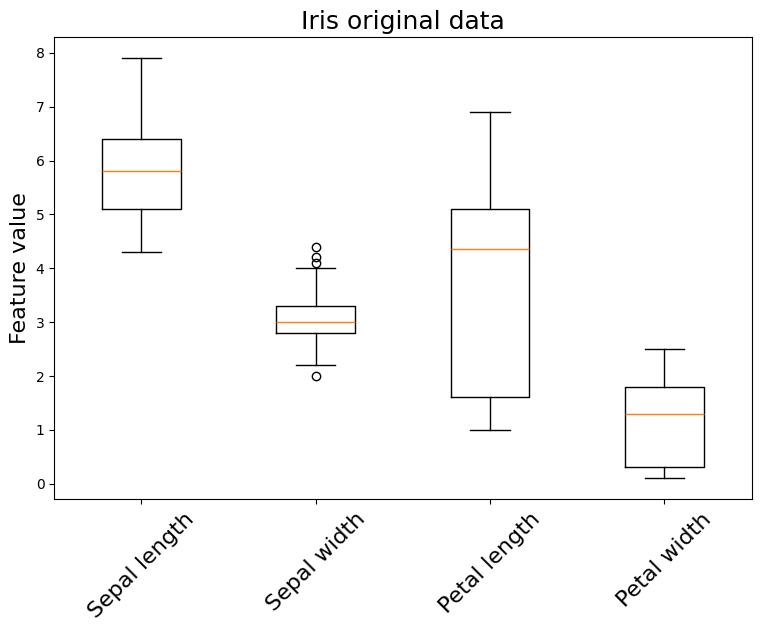

In [5]:
# Plot feature values of original IRIS data
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(iris.data)
plt.ylabel('Feature value',size=16)
plt.title('Iris original data',size=18)
labels = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
x_pos = [i for i in range(1,len(labels)+1)]
plt.xticks(x_pos, labels, rotation=45,size=16)
#fig.savefig('fig1.png', bbox_inches='tight')

([<matplotlib.axis.XTick at 0x14c7c68ed090>,
 [Text(1, 0, 'Sepal length'),
  Text(2, 0, 'Sepal width'),
  Text(3, 0, 'Petal length'),
  Text(4, 0, 'Petal width')])

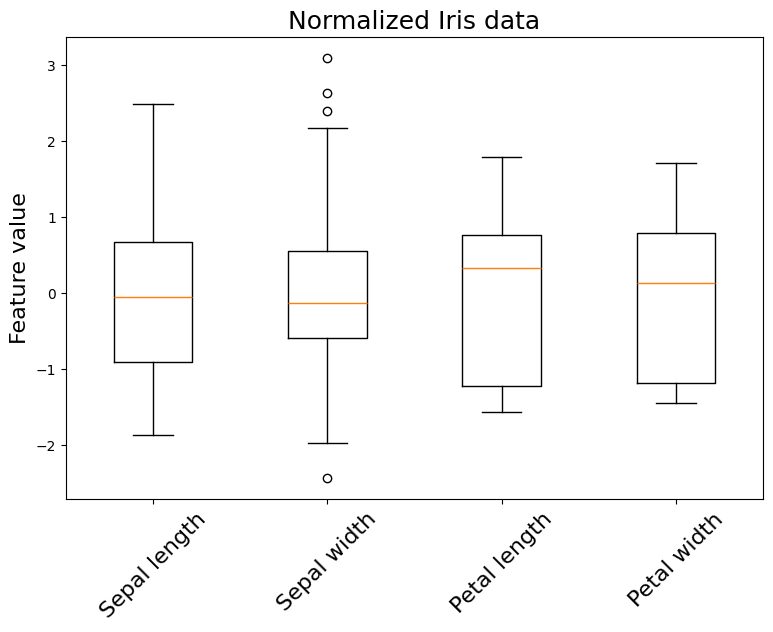

In [8]:
# Plot feature values of centered + normalized IRIS data
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(X)
plt.ylabel('Feature value',size=16)
plt.title('Normalized Iris data',size=18)
labels = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
x_pos = [i for i in range(1,len(labels)+1)]
plt.xticks(x_pos, labels, rotation=45,size=16)
#fig.savefig('fig1.png', bbox_inches='tight')

In [3]:
import torch

In [4]:
def PCA_torch(X, k, device, center=True, scale=True):
    n, p = X.size()

    X_new = X.to(device=device, dtype=torch.float32)
    print(f"X is in GPU = {X_new.is_cuda}")

    if center:
        mean = X_new.mean(axis=0, keepdim=True)
        X_new = X_new - mean
    covariance = 1/(n-1)*(X_new.T@X_new)

    if scale:
        scaling=torch.sqrt(1/torch.diag(covariance))
        covariance = torch.diag(scaling).view(p,p)@covariance@torch.diag(scaling).T

    eigenvalues, eigenvectors = torch.linalg.eig(covariance)
    eigenvalues = eigenvalues.real
    eigenvectors = eigenvectors.real

    components = (eigenvectors[:,:k])
    explained_variance = eigenvalues[:k]

    return {'k':k, 'components':components.cpu(), 'explained_variance':explained_variance.cpu(), "covariance":covariance}
    

In [6]:
cov = PCA_output["covariance"]
scaling = torch.sqrt(1/torch.diag(cov))

In [14]:
n, p = iris_data.shape
X_mean = iris_data - iris_data.mean(axis=0, keepdims=True)

In [40]:
n, p = iris_data.shape
X_mean = iris_data - iris_data.mean(axis=0, keepdims=True)
X_std = X_mean/torch.std(X_mean, axis = 0)
cov_test = 1/(n-1)*X_std.T@X_std
eigenvalues, eigenvectors = torch.linalg.eig(cov_test)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

components = (eigenvectors[:,:k])
explained_variance = eigenvalues[:k]

In [41]:
eigenvalues

tensor([2.9185, 0.9140, 0.1468, 0.0207], dtype=torch.float64)

In [37]:
eigenvectors

tensor([[ 0.5211, -0.3774, -0.7196,  0.2613],
        [-0.2693, -0.9233,  0.2444, -0.1235],
        [ 0.5804, -0.0245,  0.1421, -0.8014],
        [ 0.5649, -0.0669,  0.6343,  0.5236]], dtype=torch.float64)

In [32]:
torch.diag(cov_test)

tensor([0.6857, 0.1900, 3.1163, 0.5810], dtype=torch.float64)

In [5]:
#Corr matrix
%matplotlib inline
import matplotlib.pyplot as plt
import torch

iris = datasets.load_iris()
iris_data = torch.from_numpy(iris.data)
n, p = iris_data.size()

# Returns 2 components
k = 2

print(f'p={p}, k={k}')

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

PCA_output = PCA_torch(iris_data, k, device)

# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): {PCA_output["explained_variance"]}\n\n')

print(f'PCA basis={PCA_output["components"]}')

p=4, k=2
X is in GPU = False
Explained variance ratio (first two components): tensor([2.9185, 0.9140])


PCA basis=tensor([[-0.5211,  0.3774],
        [ 0.2693,  0.9233],
        [-0.5804,  0.0245],
        [-0.5649,  0.0669]])


In [39]:
#Scaling True
%matplotlib inline
import matplotlib.pyplot as plt
import torch

iris = datasets.load_iris()
iris_data = torch.from_numpy(iris.data)
n, p = iris_data.size()

# Returns 2 components
k = 2

print(f'p={p}, k={k}')

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

PCA_output = PCA_torch(iris_data, k, device)

# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): {PCA_output["explained_variance"]}\n\n')

print(f'PCA basis={PCA_output["components"]}')

p=4, k=2
X is in GPU = False
Explained variance ratio (first two components): tensor([3.2102, 0.4443])


PCA basis=tensor([[ 0.5308, -0.2349,  0.5839,  0.5676],
        [-0.3504, -0.9351,  0.0481,  0.0202]])


In [19]:
# Scaling False
%matplotlib inline
import matplotlib.pyplot as plt
import torch

iris = datasets.load_iris()
iris_data = torch.from_numpy(iris.data)
n, p = iris_data.size()

# Returns 2 components
k = 2

print(f'p={p}, k={k}')

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

PCA_output = PCA_torch(iris_data, k, device)

# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): {PCA_output["explained_variance"]}\n\n')

print(f'PCA basis={PCA_output["components"]}')

p=4, k=2
X is in GPU = False
Explained variance ratio (first two components): tensor([4.2282, 0.2427])


PCA basis=tensor([[-0.3614,  0.0845, -0.8567, -0.3583],
        [-0.6566, -0.7302,  0.1734,  0.0755]])


Text(0.5, 1.0, 'PCA of IRIS dataset')

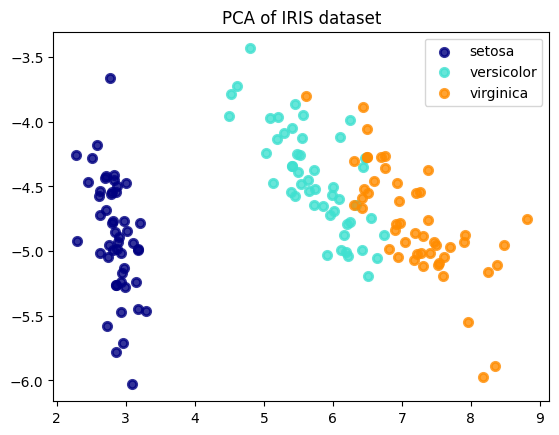

In [36]:
# Scaling True
%matplotlib inline
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

y = iris.target
target_names = iris.target_names

for color, i, target_name in zip(colors, [0,1,2], target_names):
    x_1 = iris_data[y==i,:].float()@PCA_output['components'][0]
    x_2 = iris_data[y==i,:].float()@PCA_output['components'][1]
    plt.scatter(x_1, x_2, color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5, 1.0, 'PCA of IRIS dataset')

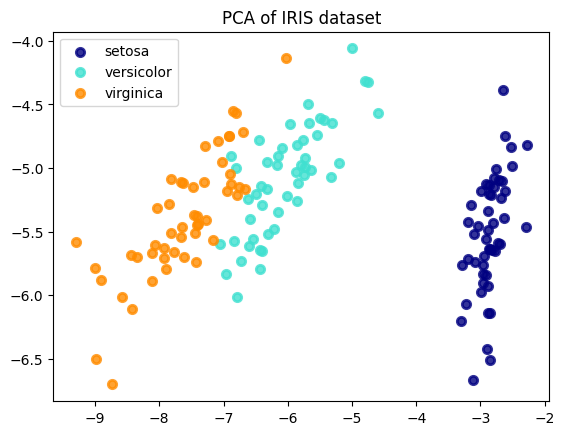

In [25]:
# Scaling False
%matplotlib inline
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

y = iris.target
target_names = iris.target_names

for color, i, target_name in zip(colors, [0,1,2], target_names):
    x_1 = iris_data[y==i,:].float()@PCA_output['components'][0]
    x_2 = iris_data[y==i,:].float()@PCA_output['components'][1]
    plt.scatter(x_1, x_2, color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

([<matplotlib.axis.XTick at 0x14c712ad5150>,
 [Text(-0.3, 0, 'Component 1'), Text(0.7, 0, 'Component 2')])

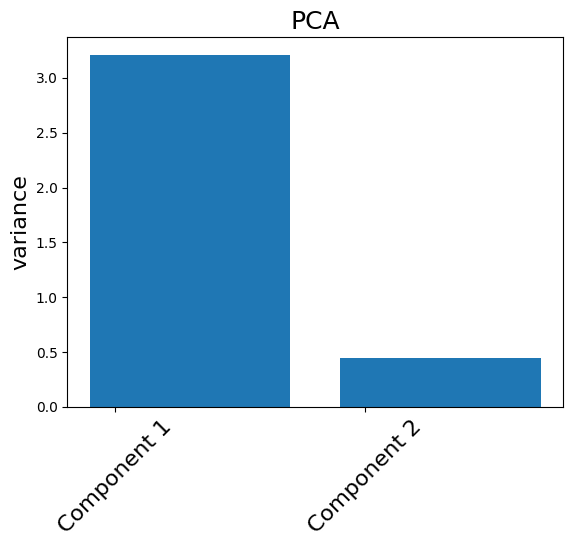

In [ ]:
# Scaling True
x = range(0,PCA_output['explained_variance'].shape[0])
y = PCA_output['explained_variance'] #The amount of variance explained by each of the selected components.
plt.bar(x, y)
#plt.xlabel('x axis label')
plt.ylabel('variance',size=16)
plt.title('PCA',size=18)
labels = ['Component 1', 'Component 2']#, 'Component 3', 'Component 4']

x_pos = [float(i)-0.3 for i in x]
plt.xticks(x_pos, labels, rotation=45,size=16)

([<matplotlib.axis.XTick at 0x14c712b88590>,
 [Text(-0.3, 0, 'Component 1'), Text(0.7, 0, 'Component 2')])

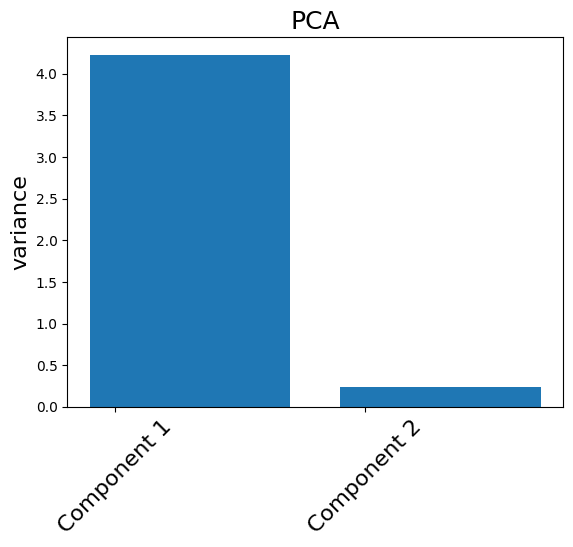

In [ ]:
# Scaling False
x = range(0,PCA_output['explained_variance'].shape[0])
y = PCA_output['explained_variance'] #The amount of variance explained by each of the selected components.
plt.bar(x, y)
#plt.xlabel('x axis label')
plt.ylabel('variance',size=16)
plt.title('PCA',size=18)
labels = ['Component 1', 'Component 2']#, 'Component 3', 'Component 4']

x_pos = [float(i)-0.3 for i in x]
plt.xticks(x_pos, labels, rotation=45,size=16)